# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Salwa Madihah Syahnevi
- **Email:** salwamadihah12@gmail.com
- **ID Dicoding:** salwa_madihah_3C2z

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 (Bagaimana Performa Penjualan Perusahaan dalam Beberapa Tahun dan Bulan Terakhir?)
- Pertanyaan 2 (Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?)
- Pertanyaan 3 (Bagaimana demografi Sellers yang kita miliki?)
- Pertanyaan 4 (Bagaimana tingkat kepuasan pelanggan pada pelayanan perusahaan?)

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import seaborn as sns

## Data Wrangling

### Gathering Data

Melakukan pengumpulan data untuk seluruh dataset untuk dilakukan analisis.

**Load tabel customers**

In [8]:
customers = pd.read_csv("/content/sample_data/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Load tabel orders**

In [3]:
orders = pd.read_csv("/content/sample_data/orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Load tabel order item**

In [9]:
order_item = pd.read_csv("/content/sample_data/order_items_dataset.csv")
order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Load tabel products**

In [5]:
product = pd.read_csv("/content/sample_data/products_dataset.csv")
product.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Load tabel sellers**

In [6]:
sellers = pd.read_csv("/content/sample_data/sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Load tabel geolocation**

In [14]:
geolocation = pd.read_csv("/content/sample_data/geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Load tabel order payments**

In [41]:
order_payments = pd.read_csv("/content/sample_data/order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Load tabel order reviews**

In [13]:
order_reviews = pd.read_csv("/content/sample_data/order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Load tabel product category name translation**

In [12]:
product_category_name = pd.read_csv("/content/sample_data/product_category_name_translation.csv")
product_category_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Karena data telah terkumpulkan, selanjutnya nilai untuk setiap kualitas data.

### Assessing Data

**Menilai data customers**

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", customers.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Berdasarkan keseluruhan penilaian, untuk data customers aman.

**Menilai data orders**

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41340 entries, 0 to 41339
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       41340 non-null  object
 1   customer_id                    41340 non-null  object
 2   order_status                   41340 non-null  object
 3   order_purchase_timestamp       41340 non-null  object
 4   order_approved_at              41264 non-null  object
 5   order_delivered_carrier_date   40611 non-null  object
 6   order_delivered_customer_date  40111 non-null  object
 7   order_estimated_delivery_date  41339 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


Kesalahan 3 tipe data pada column  order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

In [20]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  76
order_delivered_carrier_date      729
order_delivered_customer_date    1229
order_estimated_delivery_date       1
dtype: int64

Terdapat kesalahan missing value pada order_approved_at,
order_delivered_carrier_date,
order_delivered_customer_date

In [21]:
print("Jumlah duplikasi: ", orders.duplicated().sum())

Jumlah duplikasi:  0


In [22]:
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,41340,41340,41340,41340,41264,40611,40111,41339
unique,41340,41340,7,41246,39610,36733,39942,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:06:10,2017-11-07 07:30:38,2018-05-10 18:29:00,2017-12-02 00:26:45,2018-05-29 00:00:00
freq,1,1,40112,2,6,19,3,241


Untuk hasil penilaian lainnya terlihat aman.

**Menilai data order_item**

In [23]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83904 entries, 0 to 83903
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             83904 non-null  object 
 1   order_item_id        83904 non-null  int64  
 2   product_id           83904 non-null  object 
 3   seller_id            83903 non-null  object 
 4   shipping_limit_date  83903 non-null  object 
 5   price                83903 non-null  float64
 6   freight_value        83903 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 4.5+ MB


Kesalahan 1 tipe data pada column shipping_limit_date

In [24]:
order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              1
shipping_limit_date    1
price                  1
freight_value          1
dtype: int64

Terdapat kesalahan missing value

In [25]:
print("Jumlah duplikasi: ", order_item.duplicated().sum())

Jumlah duplikasi:  0


In [27]:
order_item.describe()

,order_item_id,price,freight_value
count,83904.000000,83903.000000,83903.000000
mean,1.203089,120.684554,20.000353
std,0.733530,182.823403,15.768032
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.900000,16.270000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Untuk hasil penilaian lainnya terlihat aman.

**Menilai data product**

In [26]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [28]:
product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat kesalahan missing value pada product_category_name,
product_name_lenght,
product_description_lenght,
product_photos_qty

In [29]:
print("Jumlah duplikasi: ", product.duplicated().sum())

Jumlah duplikasi:  0


In [30]:
product.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Untuk hasil penilaian lainnya terlihat aman.

**Menilai data sellers**

In [31]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [32]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [33]:
print("Jumlah duplikasi: ", sellers.duplicated().sum())

Jumlah duplikasi:  0


In [34]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Berdasarkan keseluruhan penilaian, untuk data sellers aman.

**Menilai data geolocation**

In [35]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276142 entries, 0 to 276141
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  276142 non-null  int64  
 1   geolocation_lat              276142 non-null  float64
 2   geolocation_lng              276142 non-null  float64
 3   geolocation_city             276141 non-null  object 
 4   geolocation_state            276141 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 10.5+ MB


In [36]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               1
geolocation_state              1
dtype: int64

Terdapat kesalahan missing value pada geolocation_city,
geolocation_state

In [37]:
print("Jumlah duplikasi: ", geolocation.duplicated().sum())

Jumlah duplikasi:  94635


Terdapat duplikasi data pada tabel geolocation.

In [38]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,276142.000000,276142.000000,276142.000000
mean,6135.182243,-23.587117,-46.576137
std,3025.458463,0.176915,0.276352
min,1001.000000,-25.024221,-49.523853
25%,3929.000000,-23.643580,-46.707678
50%,5678.000000,-23.565008,-46.628230
75%,8500.000000,-23.510491,-46.506668
max,12380.000000,-8.275689,-35.965615


Untuk hasil penilaian lainnya terlihat aman.

**Menilai data order_payments**

In [42]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [43]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [44]:
print("Jumlah duplikasi: ", order_payments.duplicated().sum())

Jumlah duplikasi:  0


In [45]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Berdasarkan keseluruhan penilaian, untuk data order_payments aman.

**Menilai data order_review**

In [46]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Kesalahan tipe data pada column review_creation_date dan review_answer_timestamp

In [47]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Terdapat kesalahan missing value pada review_comment_title, review_comment_message

In [48]:
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())

Jumlah duplikasi:  0


In [49]:
order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Untuk hasil penilaian lainnya terlihat aman.

**Menilai data product_category_name**

In [50]:
product_category_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [51]:
product_category_name.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [52]:
print("Jumlah duplikasi: ", product_category_name.duplicated().sum())

Jumlah duplikasi:  0


In [53]:
product_category_name.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


Berdasarkan keseluruhan penilaian, untuk data product_category_name aman.

### Cleaning Data

**Data orders**

memperbaiki kesalahan tipe data

In [54]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders[column] = pd.to_datetime(orders[column])

In [55]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41340 entries, 0 to 41339
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       41340 non-null  object        
 1   customer_id                    41340 non-null  object        
 2   order_status                   41340 non-null  object        
 3   order_purchase_timestamp       41340 non-null  datetime64[ns]
 4   order_approved_at              41264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   40611 non-null  datetime64[ns]
 6   order_delivered_customer_date  40111 non-null  datetime64[ns]
 7   order_estimated_delivery_date  41339 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 2.5+ MB


memperbaiki missing values

In [56]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  76
order_delivered_carrier_date      729
order_delivered_customer_date    1229
order_estimated_delivery_date       1
dtype: int64

In [57]:
orders[orders.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
38687,f86d7bc39aab05299691322044b63bb2,ff31bee1ba4bba00cc14b1b91c8d28f3,canceled,2018-08-13 18:43:06,NaT,NaT,NaT,2018-09-25
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
39737,c306eca42d32507b970739b5b6a5a33a,24b0e2bd287e47d54d193e7bbb51103f,canceled,2018-08-13 09:14:07,NaT,NaT,NaT,2018-09-05
39919,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaT,NaT,NaT,2018-09-10


In [58]:
orders.order_approved_at.value_counts()

2017-11-07 07:30:38    6
2018-02-27 04:31:10    5
2018-07-24 08:31:38    5
2017-12-01 11:31:59    5
2018-04-24 18:59:21    4
                      ..
2017-10-28 03:07:51    1
2017-11-05 11:10:26    1
2017-08-02 02:35:05    1
2018-02-22 02:28:38    1
2018-01-01 00:00:00    1
Name: order_approved_at, Length: 39610, dtype: int64

In [59]:
orders.fillna(value="2018-02-27 04:31:10", inplace=True)

In [60]:
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Data order_item**

memperbaiki kesalahan tipe data

In [61]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_item[column] = pd.to_datetime(order_item[column])

In [62]:
order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83904 entries, 0 to 83903
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             83904 non-null  object        
 1   order_item_id        83904 non-null  int64         
 2   product_id           83904 non-null  object        
 3   seller_id            83903 non-null  object        
 4   shipping_limit_date  83903 non-null  datetime64[ns]
 5   price                83903 non-null  float64       
 6   freight_value        83903 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 4.5+ MB


memperbaiki missing value

In [63]:
order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              1
shipping_limit_date    1
price                  1
freight_value          1
dtype: int64

In [64]:
order_item[order_item.freight_value.isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
83903,be929febed86ae91848b45a84c499e44,1,fed5c40c27e1c885,NaN,NaT,NaN,NaN


In [65]:
order_item.freight_value.value_counts()

15.10     2756
7.78      1680
14.10     1413
11.85     1381
18.23     1184
          ... 
35.89        1
39.12        1
64.21        1
2.98         1
132.28       1
Name: freight_value, Length: 6367, dtype: int64

In [66]:
order_item.fillna(value="no comment", inplace=True)

In [67]:
order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Data product**

memperbaiki missing values

In [68]:
product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [69]:
product[product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
product.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [71]:
product.fillna(value="cama_mesa_banho", inplace=True)

In [72]:
product.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Data geolocation**

memperbaiki duplikasi data

In [73]:
geolocation.duplicated().sum()

94635

In [74]:
geolocation.drop_duplicates(inplace=True)

In [75]:
print("Jumlah duplikasi: ", geolocation.duplicated().sum())

Jumlah duplikasi:  0


**Data order_review**

memperbaiki kesalahan tipe data

In [76]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews[column] = pd.to_datetime(order_reviews[column])

In [77]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


memperbaiki missing values

In [78]:
order_reviews.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [79]:
order_reviews.fillna(value="Recomendo", inplace=True)

In [80]:
order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

**Explore customers**

In [81]:
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
60266,3c988f3b57d8d2a231c6b1df1bd15cab,fe6cae7b4ec50b71fe57349e39e01e4c,4154,sao paulo,SP
56929,6401917f6b9f31fb91791bd2ce2783c8,c83903beebfa7bffbbc0a9a897a744b7,8696,suzano,SP
82379,06be66243346e59b86a04d25496b19e3,6ba32acdf26ca5cdabce839d791b634f,16050,aracatuba,SP
37488,229785783f4f6ea624c2df4952a32f45,52a01b3da2d3a255b45ee02ce465cf3d,17160,arealva,SP
95974,ce94171f740302491e9c6f36626e5354,adfe8eba67cad3f6349bbc0d59202cd8,13236,campo limpo paulista,SP


In [82]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [83]:
customers.customer_id.is_unique

True

In [84]:
customers.customer_id.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99436    False
99437    False
99438    False
99439    False
99440    False
Name: customer_id, Length: 99441, dtype: bool

In [85]:
customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [86]:
customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Explore orders**

In [87]:
orders.describe(include="all")

<ipython-input-87-53760f63e7b4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include="all")
<ipython-input-87-53760f63e7b4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include="all")
<ipython-input-87-53760f63e7b4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orders.describe(include="all")
<ipython-input-87-53760f63e7b4>:1: FutureWarning: Treat

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,41340,41340,41340,41340,41340,41340,41340,41340
unique,41340,41340,7,41246,39610,36734,39943,446
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:06:10,2018-02-27 04:31:10,2018-02-27 04:31:10,2018-02-27 04:31:10,2018-05-29 00:00:00
freq,1,1,40112,2,81,729,1229,241
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 14:46:49,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-03 18:55:29,2018-08-29 14:31:07,2018-09-03 12:56:00,2018-10-17 13:22:46,2018-10-25 00:00:00


In [88]:
orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      40112
shipped          473
canceled         259
unavailable      244
invoiced         125
processing       124
created            3
Name: order_id, dtype: int64

In [89]:
delivered_time = orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]
delivered_time = delivered_time.apply(lambda x: x.total_seconds())
orders["delivered_time"] = round(delivered_time/86400)

<Axes: >

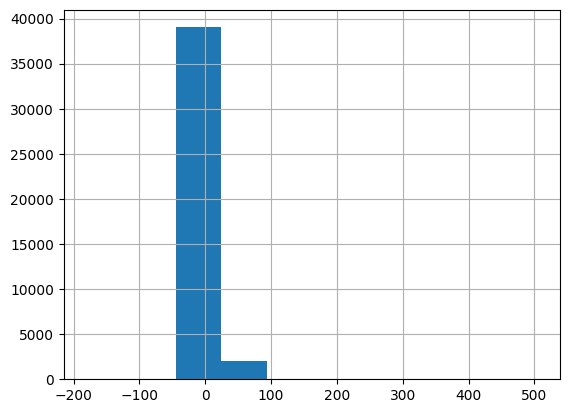

In [90]:
orders.delivered_time.hist()

**Explore data orders dan customers**

In [92]:
customer_id_in_orders_df =  orders.customer_id.tolist()
customers["status"] = customers["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
92610,19100838c0b5153ea3badd6b15191c17,9342d31563f883d5c05c5746fb075815,20511,rio de janeiro,RJ,Active
9874,9ece655f10c367e6839d25c4a46ad673,b9683d6a646f9b6f7b0a1889d00e3154,13341,indaiatuba,SP,Non Active
43522,263f578b432f4c4a154e9c7002bc6c06,d5340d65f40498ff9e47f7772081ab39,79333,corumba,MS,Active
47944,c6d5fa62a0889f8466ef3df2398cac5a,7a674bb396f3c96066e05417f0404dbe,86047,londrina,PR,Active
5701,25941254085022c9513a7b83203bc2ab,e5a9aad30b1ab64fcbcbfb64b0959b10,45810,porto seguro,BA,Non Active


In [93]:
customers.groupby(by="status").customer_id.count()

status
Active        41340
Non Active    58101
Name: customer_id, dtype: int64

**Explore sellers**

In [94]:
sellers.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [95]:
sellers.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [96]:
sellers.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

**Explore order_payment**

In [97]:
order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [98]:
order_payments.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

**Explore order_reviews**

In [99]:
order_reviews.describe(include="all")

<ipython-input-99-0748d9bdfcf1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews.describe(include="all")
<ipython-input-99-0748d9bdfcf1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_reviews.describe(include="all")


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Recomendo,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,88079,58347,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [100]:
order_reviews.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

review_score
5    57076
4    19098
1    11393
3     8160
2     3148
Name: order_id, dtype: int64

**Merge data customers dan orders**

In [101]:
orders_customers = pd.merge(
    left = orders,
    right = customers,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)

orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_time,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,Active
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,Active
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,Active
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,Active
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,Active


In [102]:
orders_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41340 entries, 0 to 41339
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       41340 non-null  object        
 1   customer_id                    41340 non-null  object        
 2   order_status                   41340 non-null  object        
 3   order_purchase_timestamp       41340 non-null  datetime64[ns]
 4   order_approved_at              41340 non-null  datetime64[ns]
 5   order_delivered_carrier_date   41340 non-null  datetime64[ns]
 6   order_delivered_customer_date  41340 non-null  datetime64[ns]
 7   order_estimated_delivery_date  41340 non-null  datetime64[ns]
 8   delivered_time                 41340 non-null  float64       
 9   customer_unique_id             41340 non-null  object        
 10  customer_zip_code_prefix       41340 non-null  int64         
 11  customer_city  

In [103]:
orders_customers.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False)

customer_city
sao paulo                  6356
rio de janeiro             2895
belo horizonte             1154
brasilia                    845
curitiba                    642
                           ... 
nova olinda do maranhao       1
nova olimpia                  1
capitao andrade               1
nova londrina                 1
ze doca                       1
Name: order_id, Length: 3080, dtype: int64

In [104]:
orders_customers.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    17414
RJ     5401
MG     4798
RS     2268
PR     2078
SC     1555
BA     1411
DF      846
GO      845
ES      826
PE      735
CE      566
PA      395
MT      349
MA      307
MS      283
PB      229
PI      191
RN      187
AL      165
SE      150
RO      103
TO       99
AM       51
AC       41
AP       24
RR       23
Name: order_id, dtype: int64

In [105]:
orders_customers.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      40112
shipped          473
canceled         259
unavailable      244
invoiced         125
processing       124
created            3
Name: order_id, dtype: int64

In [106]:
orders_customers.groupby(by="status").order_id.nunique().sort_values(ascending=False)

status
Active    41340
Name: order_id, dtype: int64

**Merge data order_payments dan order_reviews**

In [107]:
order_payments_reviews = pd.merge(
    left=order_payments,
    right=order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

order_payments_reviews.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,Recomendo,Recomendo,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Recomendo,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,Recomendo,Recomendo,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,Recomendo,Recomendo,2017-12-21,2017-12-22 01:10:39


In [108]:
order_payments_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104477 entries, 0 to 104476
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 104477 non-null  object        
 1   payment_sequential       104477 non-null  int64         
 2   payment_type             104477 non-null  object        
 3   payment_installments     104477 non-null  int64         
 4   payment_value            104477 non-null  float64       
 5   review_id                103677 non-null  object        
 6   review_score             103677 non-null  float64       
 7   review_comment_title     103677 non-null  object        
 8   review_comment_message   103677 non-null  object        
 9   review_creation_date     103677 non-null  datetime64[ns]
 10  review_answer_timestamp  103677 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 9.6+ MB


In [109]:
order_payments_reviews.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

In [110]:
order_payments_reviews.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

review_score
5.0    57076
4.0    19098
1.0    11392
3.0     8160
2.0     3148
Name: order_id, dtype: int64

**Merge data orders_customers dan order_payments_reviews**

In [111]:
customers_order_payments_reviews = pd.merge(
    left = orders_customers,
    right = order_payments_reviews,
    left_on = "order_id",
    right_on = "order_id"
)
customers_order_payments_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_time,customer_unique_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,Recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,Recomendo,Recomendo,2018-08-18,2018-08-22 19:07:58


In [112]:
customers_order_payments_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43497 entries, 0 to 43496
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       43497 non-null  object        
 1   customer_id                    43497 non-null  object        
 2   order_status                   43497 non-null  object        
 3   order_purchase_timestamp       43497 non-null  datetime64[ns]
 4   order_approved_at              43497 non-null  datetime64[ns]
 5   order_delivered_carrier_date   43497 non-null  datetime64[ns]
 6   order_delivered_customer_date  43497 non-null  datetime64[ns]
 7   order_estimated_delivery_date  43497 non-null  datetime64[ns]
 8   delivered_time                 43497 non-null  float64       
 9   customer_unique_id             43497 non-null  object        
 10  customer_zip_code_prefix       43497 non-null  int64         
 11  customer_city  

**Merge data order_item dan sellers**

In [113]:
order_item_sellers = pd.merge(
    left = order_item,
    right = sellers,
    how = "left",
    left_on = "seller_id",
    right_on = "seller_id"
)
order_item_sellers.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277.0,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,3471.0,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,37564.0,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403.0,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9,18.14,87900.0,loanda,PR


In [114]:
order_item_sellers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83904 entries, 0 to 83903
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                83904 non-null  object 
 1   order_item_id           83904 non-null  int64  
 2   product_id              83904 non-null  object 
 3   seller_id               83904 non-null  object 
 4   shipping_limit_date     83904 non-null  object 
 5   price                   83904 non-null  object 
 6   freight_value           83904 non-null  object 
 7   seller_zip_code_prefix  83903 non-null  float64
 8   seller_city             83903 non-null  object 
 9   seller_state            83903 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.0+ MB


**Merge products dan product_category_name**

In [115]:
product_product_category = pd.merge(
    left = product,
    right = product_category_name,
    how = "left",
    left_on = "product_category_name",
    right_on = "product_category_name"
)
product_product_category.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [116]:
product_product_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32951 non-null  object
 1   product_category_name          32951 non-null  object
 2   product_name_lenght            32951 non-null  object
 3   product_description_lenght     32951 non-null  object
 4   product_photos_qty             32951 non-null  object
 5   product_weight_g               32951 non-null  object
 6   product_length_cm              32951 non-null  object
 7   product_height_cm              32951 non-null  object
 8   product_width_cm               32951 non-null  object
 9   product_category_name_english  32938 non-null  object
dtypes: object(10)
memory usage: 2.8+ MB


**Merge order_item_sellers dan product_product_category**

In [117]:
order_item_sellers_product_category = pd.merge(
    left = order_item_sellers,
    right = product_product_category,
    how = "right",
    left_on = "product_id",
    right_on = "product_id"
)
order_item_sellers_product_category.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,NaN,NaN,1e9e8ef04dbcff4541ed26657ea517e5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,5236307716393b7114b53ee991f36956,1.0,3aa071139cb16b67ca9e5dea641aaa2f,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.0,17.99,2955.0,sao paulo,SP,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,01f66e58769f84129811d43eefd187fb,1.0,96bd76ec8810374ed1b65e291975717f,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.8,7.82,2016.0,sao paulo,SP,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,143d00a4f2dde4e0364ee1821577adb3,1.0,cef67bcfe19066a932b7673e239eb23d,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.3,9.54,13330.0,indaiatuba,SP,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,9dc1a7de274444849c219cff195d0b71,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.9,8.29,4461.0,sao paulo,SP,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


**Merge all data**

In [118]:
all_data = pd.merge(
    left = customers_order_payments_reviews,
    right = order_item_sellers_product_category,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)

all_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_time,customer_unique_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6.0,7c396fd4830fd04220f754e42b4e5bff,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.0,af07308b275d755c9edb36a90c618231,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,3a653a41f6f9fc3d2a113cf8398680e8,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [119]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48067 entries, 0 to 48066
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       48067 non-null  object        
 1   customer_id                    48067 non-null  object        
 2   order_status                   48067 non-null  object        
 3   order_purchase_timestamp       48067 non-null  datetime64[ns]
 4   order_approved_at              48067 non-null  datetime64[ns]
 5   order_delivered_carrier_date   48067 non-null  datetime64[ns]
 6   order_delivered_customer_date  48067 non-null  datetime64[ns]
 7   order_estimated_delivery_date  48067 non-null  datetime64[ns]
 8   delivered_time                 48067 non-null  float64       
 9   customer_unique_id             48067 non-null  object        
 10  customer_zip_code_prefix       48067 non-null  int64         
 11  customer_city  

In [120]:
all_data.to_csv("all_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Performa Penjualan Perusahaan dalam Beberapa Tahun dan Bulan Terakhir?

**Per Tahun**

In [121]:
yearly_orders = all_data.resample(rule='Y', on='order_approved_at').agg({
    "order_id": "nunique"
})
yearly_orders.index = yearly_orders.index.strftime('%Y')
yearly_orders = yearly_orders.reset_index()
yearly_orders.rename(columns={
    "order_approved_at": "year",
    "order_id": "order_count"
}, inplace=True)

yearly_orders.head()

,year,order_count
0,2016,133
1,2017,18691
2,2018,22515


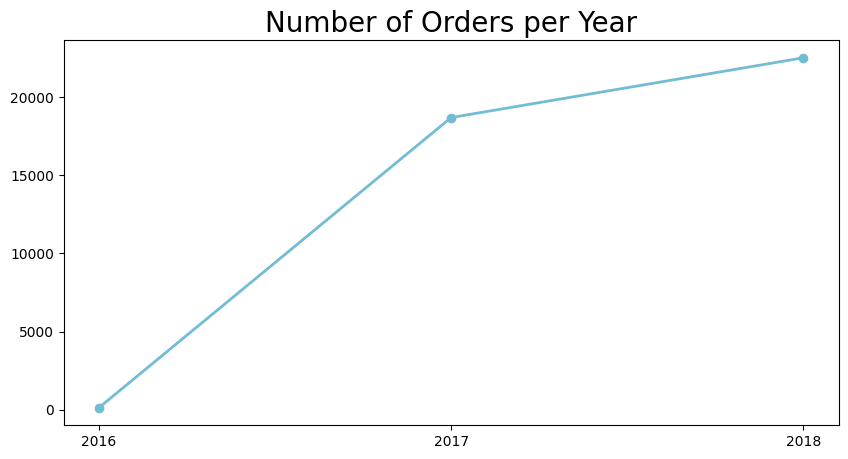

In [122]:
plt.figure(figsize=(10, 5))
plt.plot(yearly_orders["year"], yearly_orders["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Year", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Per Bulan**

In [123]:
monthly_orders = all_data.resample(rule='M', on='order_approved_at').agg({
    "order_id": "nunique"
})
monthly_orders.index = monthly_orders.index.strftime('%Y-%m')
monthly_orders = monthly_orders.reset_index()
monthly_orders.rename(columns={
    "order_approved_at": "date",
    "order_id": "order_count"
}, inplace=True)

monthly_orders.head()

,date,order_count
0,2016-10,132
1,2016-11,0
2,2016-12,1
3,2017-01,305
4,2017-02,719


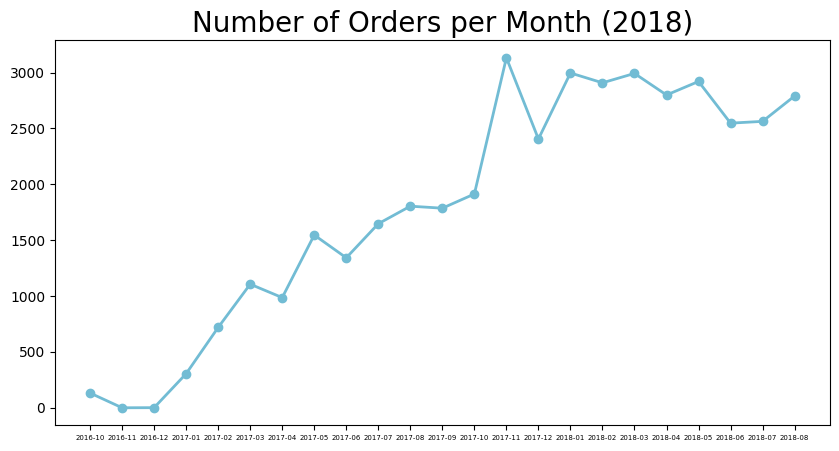

In [142]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_orders["date"], monthly_orders["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20)
plt.xticks(fontsize=5)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [125]:
sum_order_items = all_data.groupby("product_category_name_english")["product_id"].count().reset_index().sort_values(by="product_id", ascending=False)
sum_order_items = sum_order_items.rename(columns={
    "product_id": "count",
    "product_category_name_english": "product"})

sum_order_items.head()

,product,count
7,bed_bath_table,4186
43,health_beauty,3086
39,furniture_decor,2785
65,sports_leisure,2779
15,computers_accessories,2505


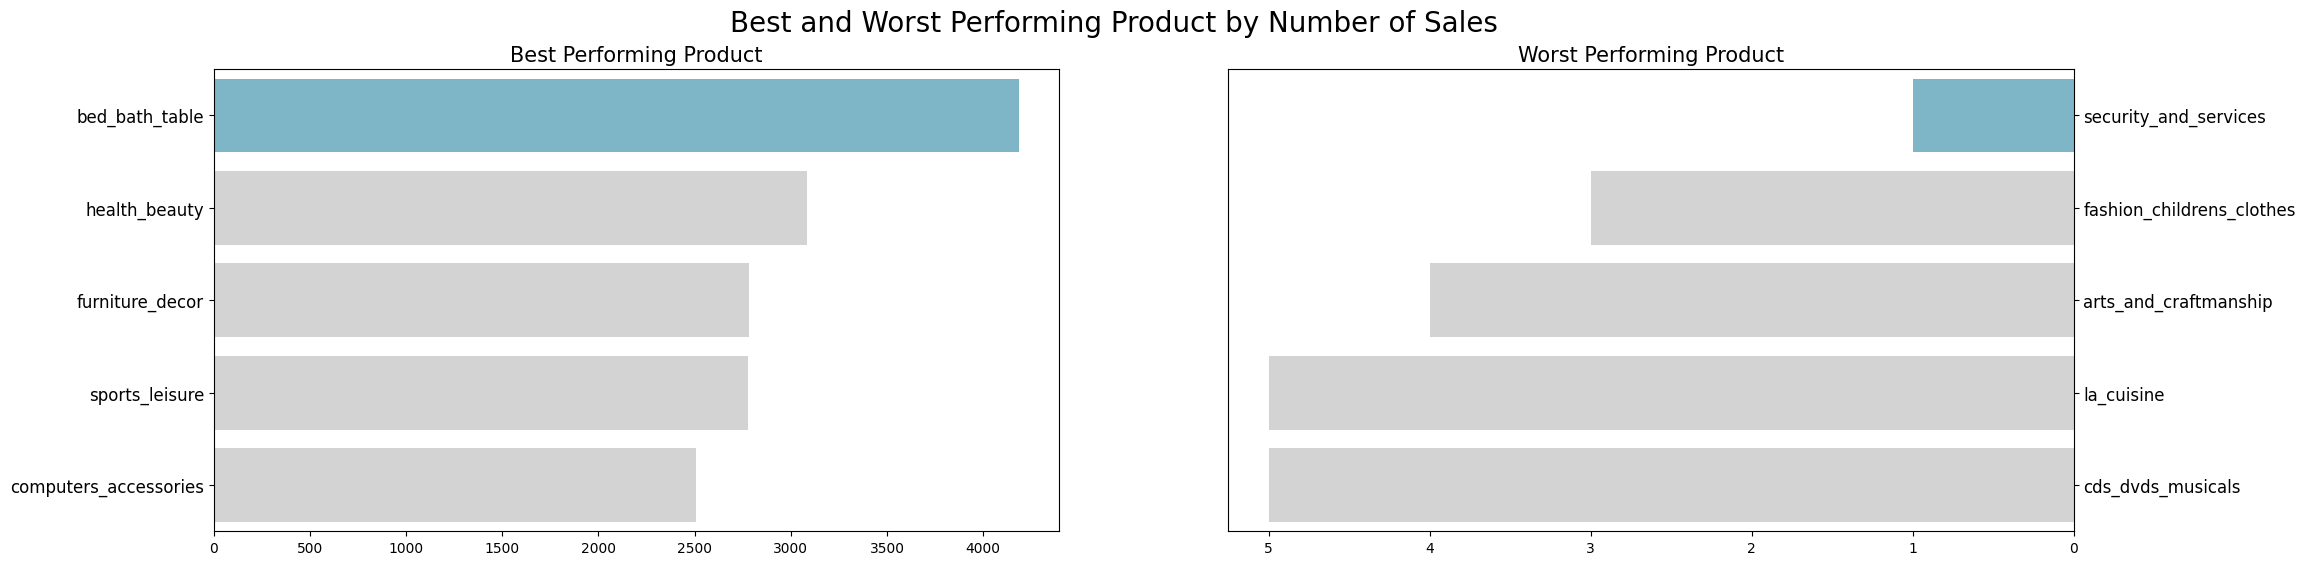

In [126]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="count", y="product", hue="product", data=sum_order_items.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="count", y="product", hue="product", data=sum_order_items.sort_values(by="count", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana demografi Sellers yang kita miliki?

In [127]:
sum_demografi_sellers = all_data.groupby("seller_state")["seller_id"].count().reset_index().sort_values(by="seller_id", ascending=False)
sum_demografi_sellers = sum_demografi_sellers.rename(columns={
    "seller_id": "count",
    "seller_state": "state"})

sum_demografi_sellers.head()

,state,count
21,SP,26329
14,PR,2794
7,MG,2755
15,RJ,1583
19,SC,1322


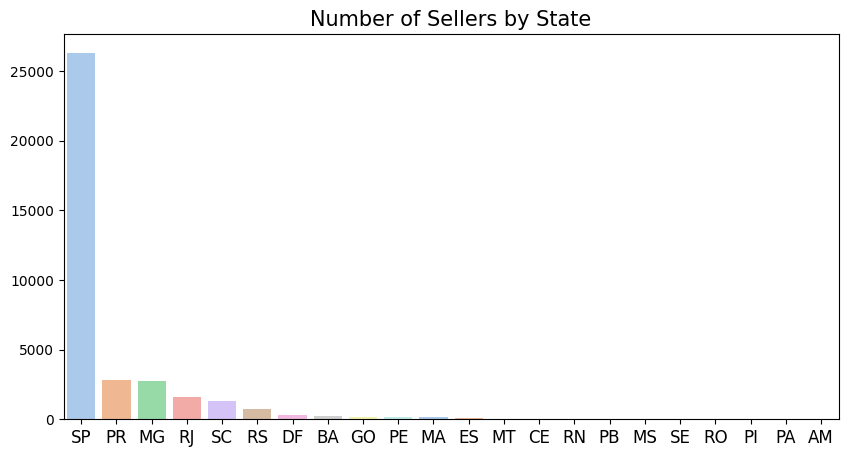

In [128]:
plt.figure(figsize=(10, 5))

# Menambahkan warna tambahan untuk mengatasi error kekurangan warna
colors = sns.color_palette("pastel", len(sum_demografi_sellers["state"].unique()))

sns.barplot(
    x="state",
    y="count",
    data=sum_demografi_sellers.sort_values(by="count", ascending=False),
    palette=colors,
    hue="state",
    legend=False
)
plt.title("Number of Sellers by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 4: Bagaimana tingkat kepuasan pelanggan pada pelayanan perusahaan?

In [129]:
customer_reviews = all_data.groupby("review_score")["order_id"].count().reset_index().sort_values(by="order_id", ascending=False)
customer_reviews = customer_reviews.rename(columns={
    "order_id": "count",
    "review_score": "rate"})

customer_reviews.head()

,rate,count
4,5.0,27009
3,4.0,9168
0,1.0,5989
2,3.0,3910
1,2.0,1613


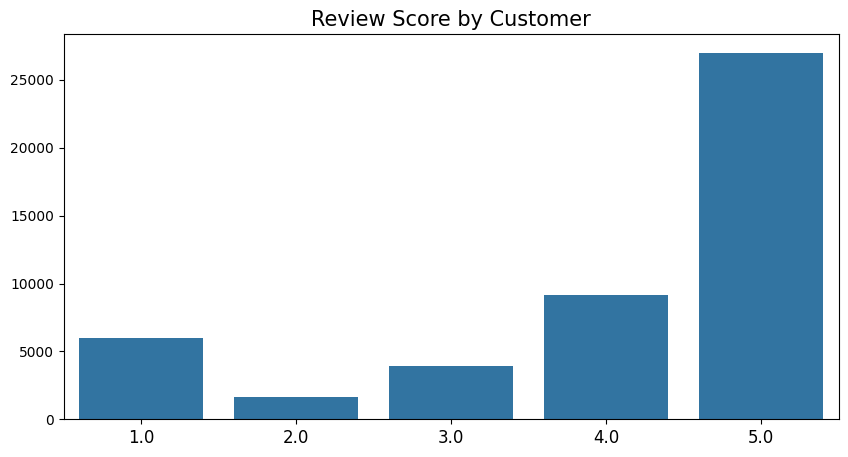

In [140]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x="rate",
    y="count",
    data=customer_reviews.sort_values(by="count", ascending=False)
)
plt.title("Review Score by Customer", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

## Conclusion

**- Conclution pertanyaan 1**

Berdasarkan **Grafik Order per Year** dapat dilihat bahwasannya perusahaan memiliki performa yang meningkat bertahap dari 2016 ke 2017.
Berdasarka **Grafik Order per Month** dapat dilihat bahwasannya perusahaan memiliki performa yang meningkat, namun terdapat penurunan pada bulan 12 tahun 2017.

**- Conclution pertanyaan 2**

Berdasarkan **Grafik Best Performing Product** menunjukkan bahwasannya bed_bath_table merupakan produk terbaik. Sedangkan **Grafik Worst Performing Product** menunjukkan bahwasannya security_and_service merupakan produk terburuk pada perusahaan ini.

**- Conclution pertanyaan 3**

Berdasarkan **Visualisasi Bar Chart** menunjukkan bahwasannya sellers terbanyak pada perusahaan ini berada di Sao Paulo (SP).

**- Conclution pertanyaan 4**

Berdasarkan **Visualisasi Bar Chart** menunjuukan bahwasannya customers merasa puas dengan pelayanan yang ada di perusahaan ini. Hal itu ditunjukkan dengan rating review tingkatan 5 memperoleh jumlah data lebih dari 25000.